In [46]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [7]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,4.069709,1.782131,3.412475,-2.095273,5.032174,1
1,-1.738786,0.925179,0.767261,-2.951204,-3.609551,0
2,0.130091,1.266735,1.322449,-2.781121,-0.747639,0
3,-0.280540,0.586255,1.691294,-0.426839,-2.580555,0
4,1.874411,2.831092,0.736618,-1.120097,-0.176101,0


In [8]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [47]:
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [10]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [69]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_15248\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [70]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_15248\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [71]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_15248\1824989938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [81]:
df3

,col4,col3,target
1,-2.951204,0.767261,0
15,-0.784705,0.406998,1
97,1.388247,-0.601120,1
56,-1.464496,0.860395,1
22,-0.902692,-0.341799,0
3,-0.426839,1.691294,0
3,-0.426839,1.691294,0
69,-1.779923,-1.235166,0
55,-0.980527,2.150544,0
92,0.004528,0.816176,1


In [74]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [75]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [76]:
from sklearn.tree import plot_tree

[Text(0.39705882352941174, 0.9285714285714286, 'x[1] <= -0.701\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.17647058823529413, 0.7857142857142857, 'x[0] <= 0.388\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.2867647058823529, 0.8571428571428572, 'True  '),
 Text(0.11764705882352941, 0.6428571428571429, 'x[0] <= -0.116\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.17647058823529413, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.6428571428571429, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6176470588235294, 0.7857142857142857, 'x[0] <= 2.665\ngini = 0.32\nsamples = 35\nvalue = [28, 7]'),
 Text(0.5073529411764706, 0.8571428571428572, '  False'),
 Text(0.35294117647058826, 0.6428571428571429, 'x[0] <= 0.133\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.29411764705882354, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.4

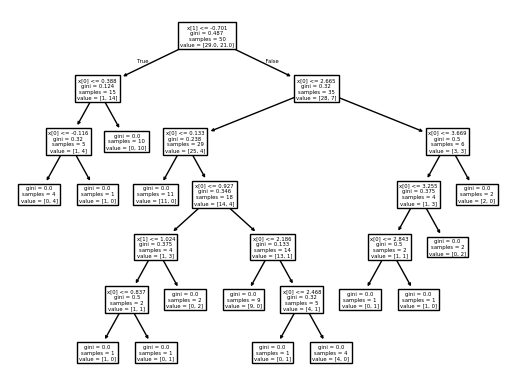

In [77]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[1] <= -0.67\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2, 0.7, 'x[1] <= -1.524\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.3, 0.5, 'x[1] <= -1.195\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.7, 'x[0] <= 2.355\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'x[0] <= 0.754\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.6, 0.3, 'x[0] <= 0.155\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

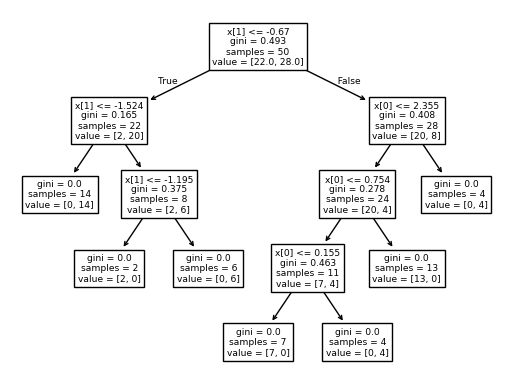

In [78]:
plot_tree(clf2)

[Text(0.6071428571428571, 0.9166666666666666, 'x[1] <= 0.972\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.42857142857142855, 0.75, 'x[0] <= -1.749\ngini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.5178571428571428, 0.8333333333333333, 'True  '),
 Text(0.2857142857142857, 0.5833333333333334, 'x[1] <= 0.758\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[1] <= 0.161\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= -1.618\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.35714285714285715, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[1] <= -0.33\ngini = 0.

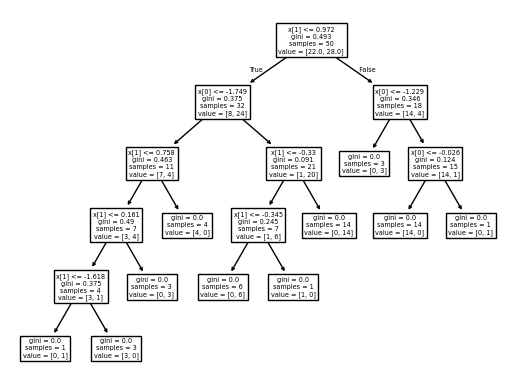

In [79]:
plot_tree(clf3)

In [86]:
clf1.predict(np.array([-1.718017,	0.371510	]).reshape(1,2))

C:\Users\HP\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
clf2.predict(np.array([-1.718017,	0.371510	]).reshape(1,2))

C:\Users\HP\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [88]:
clf3.predict(np.array([-1.718017,	0.371510	]).reshape(1,2))

C:\Users\HP\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])